In [1]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
data = np.genfromtxt('nordic_lakes_data-1.txt',skip_header=1,usecols = (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [3]:
Lat = data[:,0]
Lon = data[:,1]
pH = data[:,2]
K25 = data[:,3]
Ca = data[:,4]
Mg = data[:,5]
Na = data[:,6]
K = data[:,7]
HCO3 = data[:,8]
Cl = data[:,9]
SO4 = data[:,10]
NO3 = data[:,11]


R squared = 0.8418541843737232
y=0.685331x+(20.201737)


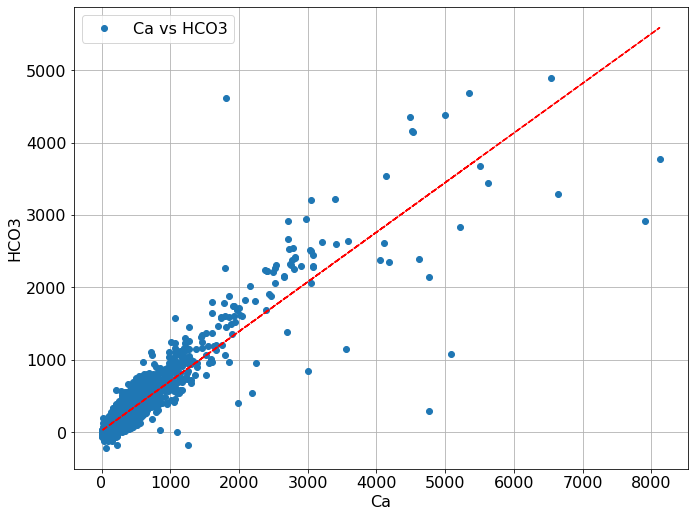

In [27]:
plt.rcParams.update({'font.size': 16})


correlation_matrix_CaHCO3 = np.corrcoef(Ca, HCO3)
correlation_CaHCO3 = correlation_matrix_CaHCO3[0,1]
r_squared = correlation_CaHCO3**2

print('R squared =', r_squared)

plt.figure(figsize=(11.0,8.5))
plt.plot(Ca,HCO3,'o',label='Ca vs HCO3')
plt.grid()
plt.xlabel('Ca')
plt.ylabel('HCO3')
z = np.polyfit(Ca,HCO3, 1)
p = np.poly1d(z)
plt.plot(Ca,p(Ca),"r--")
CaHCO3 = print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.legend(loc='upper left')


R squared = 0.9356375996186946
y=1.004639x+(-19.391598)


(0.0, 3000.0)

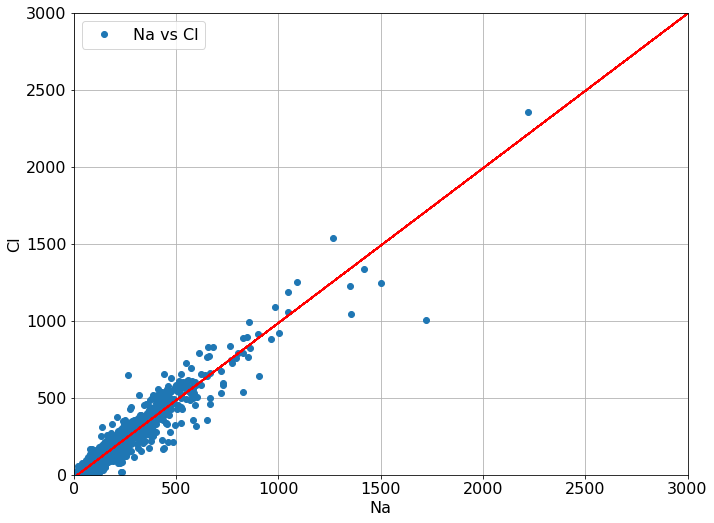

In [30]:
plt.rcParams.update({'font.size': 16})


correlation_matrix_NaCl = np.corrcoef(Na, Cl)
correlation_NaCl = correlation_matrix_NaCl[0,1]
r_squared2 = correlation_NaCl**2

print('R squared =', r_squared2)

plt.figure(figsize=(11.0,8.5))
plt.plot(Na,Cl,'o',label='Na vs Cl')
plt.grid()
plt.xlabel('Na')
plt.ylabel('Cl')
w = np.polyfit(Na,Cl, 1)
q = np.poly1d(w)
plt.plot(Ca,q(Ca),"r--")
NaCl = print ("y=%.6fx+(%.6f)"%(w[0],w[1]))
plt.legend(loc='upper left')
plt.xlim(0,3000)
plt.ylim(0,3000)


In [37]:
charge = ((Ca + Mg + Na + K)-(Cl + SO4 + NO3))

In [36]:
charge

array([  87.1 ,  265.6 ,   13.7 , ..., 5174.79, 5122.57, 5331.71])

R squared = 0.9374480619360754
y=0.767600x+(-11.278243)


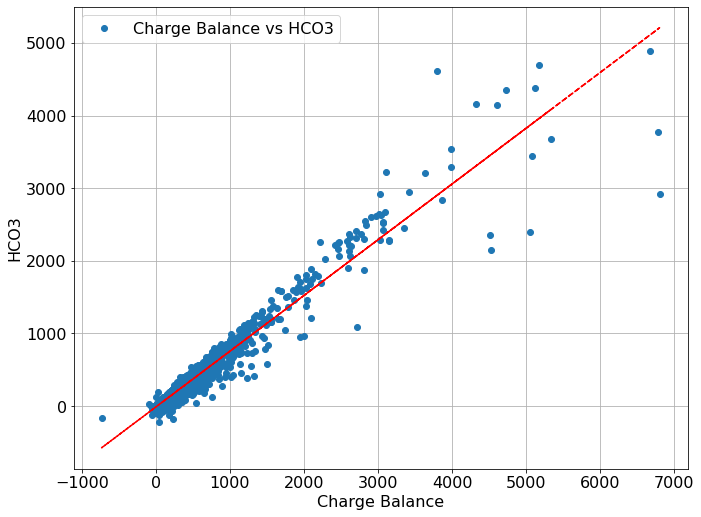

In [39]:
plt.rcParams.update({'font.size': 16})


correlation_matrix_charge = np.corrcoef(charge, HCO3)
correlation_charge = correlation_matrix_charge[0,1]
r_squared3 = correlation_charge**2

print('R squared =', r_squared3)

plt.figure(figsize=(11.0,8.5))
plt.plot(charge,HCO3,'o',label='Charge Balance vs HCO3')
plt.grid()
plt.xlabel('Charge Balance')
plt.ylabel('HCO3')
v = np.polyfit(charge,HCO3, 1)
o = np.poly1d(v)
plt.plot(charge,o(charge),"r--")
chargebalance = print ("y=%.6fx+(%.6f)"%(v[0],v[1]))
plt.legend(loc='upper left')

R squared = 0.27106684689687477
y=0.000145x+(1.852924)


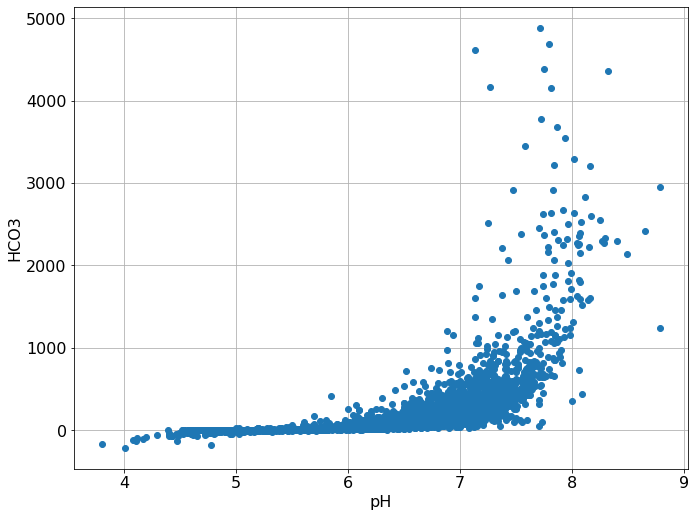

In [87]:

plt.rcParams.update({'font.size': 16})
log_ph_data = np.log(pH)
#log_HCO3_data = np.log(HCO3)

correlation_matrix_phHCO3 = np.corrcoef(pH, HCO3)
correlation_phHCO3 = correlation_matrix_phHCO3[0,1]
r_squared4 = correlation_phHCO3**2

print('R squared =', r_squared4)

plt.figure(figsize=(11.0,8.5))
plt.plot(pH,HCO3,'o',label='pH vs HCO3')
plt.grid()
plt.ylabel('HCO3')
plt.xlabel('pH')
#u = np.polyfit(HCO3, np.log(pH), 1)
#l = np.poly1d(u)
#plt.plot(HCO3,l(HCO3),"r--")
phHCO3 = print ("y=%.6fx+(%.6f)"%(u[0],u[1]))
#plt.legend(loc='upper left')

In [71]:
curve_fit[0]

1612.1002657485228

In [73]:

ypH = curve_fit[0]* log_ph_data - curve_fit[1]

In [91]:
H = (10**(-pH))
OH = (10**(-(14-pH)))

In [95]:
Alk = HCO3 + OH - pH
HCO3

array([  60.,  200.,    0., ..., 4691., 4380., 3676.])

In [123]:
import pandas as pd

data = {'Lat':Lat,'Lon':Lon, 'pH':pH, 'K25':K25, 'Ca':Ca, 'Mg':Mg,'Na':Na,'K':K,'HCO3':HCO3,'Cl':Cl,'SO4':SO4,'NO3':NO3,'Alkalinity':Alk}

df = pd.DataFrame(data, columns = ['Lat','Lon','pH','K25','Ca','Mg','Na','K','HCO3','Cl','SO4','NO3','Alkalinity'])

df.to_csv ('/Users/michellehalling/Documents/Spring 2022/Acid-Base_Crowther.csv', index = False, header=True)

In [124]:
df


,Lat,Lon,pH,K25,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,Alkalinity
0,60.1275,23.4872,6.30,3.3,125.0,66.0,78.0,10.0,60.0,54.0,137.0,0.90,53.700000
1,60.8819,25.5233,6.60,4.1,175.0,107.0,91.0,20.0,200.0,34.0,92.0,1.40,193.400000
2,60.1372,24.3586,5.40,2.1,60.0,33.0,52.0,8.0,0.0,42.0,94.0,3.30,-5.400000
3,60.2467,24.2447,5.70,3.4,135.0,66.0,74.0,13.0,20.0,51.0,165.0,5.70,14.300000
4,60.2922,24.5975,5.10,3.1,110.0,58.0,65.0,8.0,10.0,39.0,144.0,1.10,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,57.5702,18.7900,7.71,53.5,6540.0,775.0,320.0,63.0,4885.0,301.0,701.0,29.64,4877.290001
4883,57.3122,18.3993,7.81,46.5,4531.0,305.0,211.0,67.0,4149.0,261.0,220.0,21.29,4141.190001
4884,57.3297,18.4677,7.79,48.7,5351.0,271.0,164.0,20.0,4691.0,168.0,439.0,24.21,4683.210001
4885,57.2883,18.4035,7.75,43.8,5001.0,224.0,185.0,72.0,4380.0,169.0,172.0,18.43,4372.250001
